# Traveling Companions: Part 3

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Take in all of our traveler data and read it into pandas
travel_2016 = "../Resources/2016_travelers.csv"
travel_2017 = "../Resources/2017_travelers.csv"
travel_2018 = "../Resources/2018_travelers.csv"

travel_2016_df = pd.read_csv(travel_2016)
travel_2017_df = pd.read_csv(travel_2017)
travel_2018_df = pd.read_csv(travel_2018)


In [3]:
# Merge the first two datasets on "COUNTRY OF NATIONALITY" so that no data is lost (should be 44 rows)
combined_travel_df = pd.merge(travel_2016_df, travel_2017_df,
                                 how='outer', on='COUNTRY OF NATIONALITY')
combined_travel_df.head()

,COUNTRY OF NATIONALITY,ALONE_x,WITH SPOUSE_x,WITH CHILDREN_x,WITH FAMILY/RELATIVES_x,STUDENT GROUP_x,WITH FRIENDS_x,WITH BUSINESS ACCOCIATE_x,WITH INCENTIVE GROUP_x,OTHERS_x,ALONE_y,WITH SPOUSE_y,WITH CHILDREN_y,WITH FAMILY/RELATIVES_y,STUDENT GROUP_y,WITH FRIENDS_y,WITH BUSINESS ACCOCIATE_y,WITH INCENTIVE GROUP_y,OTHERS_y
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,20.6,39.4,5.9,22.9,0.2,9.3,1.1,0.1,0.5
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,23.2,17.8,4.2,11.8,4.4,29.3,4.8,2.7,1.8
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,10.4,28.0,3.9,34.9,0.9,15.5,2.7,2.3,1.4
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,6.8,21.2,2.2,54.5,0.1,14.2,0.8,0.0,0.0
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,3.5,7.6,0.2,40.0,0.2,46.4,1.9,0.1,0.2


In [4]:
# Rename our _x columns to "2016 Alone", "2016 With Spouse", "2016 With Children", "2016 With Family/Relatives",
# "2016 Student Group", "2016 With Friends", "2016 With Business Associate", "2016 With Incentive Group",
# and "2016 Others"

combined_travel_df = combined_travel_df.rename(columns={"ALONE_x":"2016 Alone",
                                                        "WITH SPOUSE_x":"2016 With Spouse",
                                                        "WITH CHILDREN_x":"2016 With Children",
                                                        "WITH FAMILY/RELATIVES_x":"2016 With Family/Relatives",
                                                        "STUDENT GROUP_x":"2016 Student Group",
                                                        "WITH FRIENDS_x":"2016 With Friends",
                                                        "WITH BUSINESS ACCOCIATE_x":"2016 With Business Associate",
                                                        "WITH INCENTIVE GROUP_x":"2016 With Incentive Group",
                                                        "OTHERS_x":"2016 Others"})

# Rename our _y columns to "2016 Alone", "2016 With Spouse", "2016 With Children", "2016 With Family/Relatives",
# "2016 Student Group", "2016 With Friends", "2016 With Business Associate", "2016 With Incentive Group",
# and "2016 Others"
combined_travel_df = combined_travel_df.rename(columns={"ALONE_y":"2017 Alone",
                                                        "WITH SPOUSE_y":"2017 With Spouse",
                                                        "WITH CHILDREN_y":"2017 With Children",
                                                        "WITH FAMILY/RELATIVES_y":"2017 With Family/Relatives",
                                                        "STUDENT GROUP_y":"2017 Student Group",
                                                        "WITH FRIENDS_y":"2017 With Friends",
                                                        "WITH BUSINESS ACCOCIATE_y":"2017 With Business Associate",
                                                        "WITH INCENTIVE GROUP_y":"2017 With Incentive Group",
                                                        "OTHERS_y":"2017 Others"})

combined_travel_df.head()

,COUNTRY OF NATIONALITY,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 Student Group,2016 With Friends,2016 With Business Associate,2016 With Incentive Group,2016 Others,2017 Alone,2017 With Spouse,2017 With Children,2017 With Family/Relatives,2017 Student Group,2017 With Friends,2017 With Business Associate,2017 With Incentive Group,2017 Others
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,20.6,39.4,5.9,22.9,0.2,9.3,1.1,0.1,0.5
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,23.2,17.8,4.2,11.8,4.4,29.3,4.8,2.7,1.8
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,10.4,28.0,3.9,34.9,0.9,15.5,2.7,2.3,1.4
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,6.8,21.2,2.2,54.5,0.1,14.2,0.8,0.0,0.0
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,3.5,7.6,0.2,40.0,0.2,46.4,1.9,0.1,0.2


In [5]:
# Merge our newly combined dataframe with the 2018 dataframe
combined_travel_df = pd.merge(combined_travel_df, travel_2018_df, how="outer", on="COUNTRY OF NATIONALITY")
combined_travel_df

,COUNTRY OF NATIONALITY,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 Student Group,2016 With Friends,2016 With Business Associate,2016 With Incentive Group,2016 Others,...,2017 Others,ALONE,WITH SPOUSE,WITH CHILDREN,WITH FAMILY/RELATIVES,STUDENT GROUP,WITH FRIENDS,WITH BUSINESS ACCOCIATE,WITH INCENTIVE GROUP,OTHERS
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,...,0.5,16.9,34.6,5.0,25.3,0.7,14.4,0.6,2.5,0.1
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,...,1.8,20.6,6.7,7.2,33.5,1.2,29.8,0.4,0.4,0.2
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,...,1.4,11.3,31.1,4.0,34.4,1.1,14.7,0.7,2.3,0.5
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,...,0.0,17.5,28.1,2.0,40.0,0.1,11.6,0.4,0.1,0.1
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,...,0.2,5.5,20.6,0.7,29.5,0.5,39.2,1.6,1.6,0.7
5,VIETNAM,5.8,11.5,0.6,31.0,0.6,35.5,2.7,7.4,5.0,...,5.8,0.9,12.3,2.8,44.2,0.0,30.2,0.6,6.1,3.0
6,CHINA,4.2,30.9,0.7,37.8,0.5,18.4,1.3,2.4,3.7,...,2.2,1.9,23.9,0.7,39.3,0.8,22.1,1.1,9.7,0.4
7,JAPAN,10.9,26.5,0.6,16.4,0.8,18.4,25.6,0.3,0.6,...,0.8,4.2,22.7,0.2,26.3,1.9,25.3,17.4,1.3,0.5
8,SOUTH KOREA,9.4,36.3,0.6,16.3,0.0,28.1,8.1,0.0,1.3,...,0.6,1.6,29.1,0.1,33.5,0.0,28.7,1.0,5.9,0.1
9,TAIWAN,7.8,55.7,1.2,24.6,0.0,9.3,0.3,0.6,0.6,...,0.7,0.3,28.1,0.0,34.3,1.6,31.4,1.5,2.4,0.3


In [6]:
# Rename "ALONE", "WITH SPOUSE", "WITH CHILDREN", "WITH FAMILY/RELATIVES", "STUDENT GROUP", "WITH FRIENDS",
# "WITH BUSINESS ACCOCIATE","WITH INCENTIVE GROUP", "OTHERS" to 
# "2018 Alone", "2018 With Spouse", "2018 With Children", "2018 With Family/Relatives", "2018 Student Group", 
# "2018 With Friends", "2018 With Business Associate", "2018 With Incentive Group", and "2018 Others"
combined_travel_df = combined_travel_df.rename(columns={"ALONE":"2018 Alone",
                                                        "WITH SPOUSE":"2018 With Spouse",
                                                        "WITH CHILDREN":"2018 With Children",
                                                        "WITH FAMILY/RELATIVES":"2018 With Family/Relatives",
                                                        "STUDENT GROUP":"2018 Student Group",
                                                        "WITH FRIENDS":"2018 With Friends",
                                                        "WITH BUSINESS ACCOCIATE":"2018 With Business Associate",
                                                        "WITH INCENTIVE GROUP":"2018 With Incentive Group",
                                                        "OTHERS":"2018 Others"})

combined_travel_df.head()

,COUNTRY OF NATIONALITY,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 Student Group,2016 With Friends,2016 With Business Associate,2016 With Incentive Group,2016 Others,...,2017 Others,2018 Alone,2018 With Spouse,2018 With Children,2018 With Family/Relatives,2018 Student Group,2018 With Friends,2018 With Business Associate,2018 With Incentive Group,2018 Others
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,...,0.5,16.9,34.6,5.0,25.3,0.7,14.4,0.6,2.5,0.1
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,...,1.8,20.6,6.7,7.2,33.5,1.2,29.8,0.4,0.4,0.2
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,...,1.4,11.3,31.1,4.0,34.4,1.1,14.7,0.7,2.3,0.5
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,...,0.0,17.5,28.1,2.0,40.0,0.1,11.6,0.4,0.1,0.1
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,...,0.2,5.5,20.6,0.7,29.5,0.5,39.2,1.6,1.6,0.7


### Part 2

In [9]:
# Check the mean of the columns
combined_travel_df.describe()

,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 Student Group,2016 With Friends,2016 With Business Associate,2016 With Incentive Group,2016 Others,2017 Alone,...,2017 Others,2018 Alone,2018 With Spouse,2018 With Children,2018 With Family/Relatives,2018 Student Group,2018 With Friends,2018 With Business Associate,2018 With Incentive Group,2018 Others
count,44.000000,44.000000,44.00000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,15.890909,34.202273,1.27500,20.434091,0.715909,20.300000,3.088636,1.065909,0.768182,12.447727,...,1.106818,7.477273,31.693182,1.325000,28.638636,1.179545,25.368182,2.143182,1.445455,0.738636
std,9.460784,13.956119,1.13304,13.648442,1.482917,10.204878,4.075863,2.600353,1.148259,8.536556,...,1.791115,5.583775,9.679862,1.943759,13.749135,2.006221,11.183413,2.949608,2.404014,1.250900
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,...,0.000000,0.300000,6.700000,0.000000,7.000000,0.000000,1.900000,0.000000,0.000000,0.000000
25%,10.000000,26.100000,0.57500,10.825000,0.000000,15.125000,1.050000,0.000000,0.000000,4.750000,...,0.000000,2.200000,25.875000,0.300000,17.900000,0.000000,19.975000,0.700000,0.000000,0.000000
50%,14.050000,35.900000,0.90000,16.850000,0.050000,19.250000,2.150000,0.000000,0.300000,11.100000,...,0.550000,5.950000,31.100000,0.700000,25.800000,0.500000,27.250000,1.150000,0.200000,0.250000
75%,21.725000,42.250000,1.60000,25.825000,0.650000,27.575000,4.025000,0.450000,1.125000,18.400000,...,1.400000,11.450000,36.975000,1.200000,39.475000,1.225000,32.275000,2.075000,1.675000,0.750000
max,39.700000,75.000000,4.70000,60.500000,7.200000,48.600000,25.600000,10.800000,5.000000,28.900000,...,8.500000,20.600000,57.100000,9.700000,58.700000,11.200000,48.500000,17.400000,9.700000,5.300000


In [11]:
# Reduce columns where mean of traveling companions is > 1 across all years
travel_reduced = pd.DataFrame(combined_travel_df[["COUNTRY OF NATIONALITY",
                                                  "2016 Alone","2016 With Spouse","2016 With Children",
                                                  "2016 With Family/Relatives","2016 With Friends",
                                                  "2016 With Business Associate","2017 Alone",
                                                  "2017 With Spouse","2017 With Children",
                                                  "2017 With Family/Relatives","2017 With Friends",
                                                  "2017 With Business Associate","2018 Alone",
                                                  "2018 With Spouse","2018 With Children",
                                                  "2018 With Family/Relatives","2018 With Friends",
                                                  "2018 With Business Associate"]])

# Set index to "Country of Nationality"
travel_reduced = travel_reduced.set_index("COUNTRY OF NATIONALITY")
travel_reduced

,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 With Friends,2016 With Business Associate,2017 Alone,2017 With Spouse,2017 With Children,2017 With Family/Relatives,2017 With Friends,2017 With Business Associate,2018 Alone,2018 With Spouse,2018 With Children,2018 With Family/Relatives,2018 With Friends,2018 With Business Associate
COUNTRY OF NATIONALITY,,,,,,,,,,,,,,,,,,
SINGAPORE,18.6,35.5,3.9,23.7,14.7,2.2,20.6,39.4,5.9,22.9,9.3,1.1,16.9,34.6,5.0,25.3,14.4,0.6
THAILAND,30.1,16.7,0.9,12.0,30.2,4.8,23.2,17.8,4.2,11.8,29.3,4.8,20.6,6.7,7.2,33.5,29.8,0.4
INDONESIA,12.9,24.6,3.8,37.9,14.9,2.1,10.4,28.0,3.9,34.9,15.5,2.7,11.3,31.1,4.0,34.4,14.7,0.7
BRUNEI,10.2,24.9,2.2,44.5,16.2,1.1,6.8,21.2,2.2,54.5,14.2,0.8,17.5,28.1,2.0,40.0,11.6,0.4
PHILIPPINES,13.9,27.5,1.5,15.0,34.1,1.1,3.5,7.6,0.2,40.0,46.4,1.9,5.5,20.6,0.7,29.5,39.2,1.6
VIETNAM,5.8,11.5,0.6,31.0,35.5,2.7,2.8,11.5,0.7,37.0,32.5,1.1,0.9,12.3,2.8,44.2,30.2,0.6
CHINA,4.2,30.9,0.7,37.8,18.4,1.3,1.9,30.4,0.7,42.0,20.4,0.5,1.9,23.9,0.7,39.3,22.1,1.1
JAPAN,10.9,26.5,0.6,16.4,18.4,25.6,8.4,30.3,0.0,20.0,25.4,8.5,4.2,22.7,0.2,26.3,25.3,17.4
SOUTH KOREA,9.4,36.3,0.6,16.3,28.1,8.1,4.6,36.8,1.3,33.2,19.5,1.6,1.6,29.1,0.1,33.5,28.7,1.0


### Part 3 - Charting Traveling Companions

* Create 3 variables, one for each country to chart.

* Create a variable for the type of traveling companion to compare.

* Store each country's percentage of travelers for the chosen traveling companion over time in 3 variables (one for each country)

* Create a line chart that will plot the comparison of each country's percentage of travelers with the chosen traveling companion from 2016 to 2018

In [15]:
# Create a variable for each country to chart automatically based on the values of the "Country Of Nationality" column
countries = travel_reduced.index.values
countries
# create a variable for each 'SINGAPORE', 'THAILAND', 'INDONESIA', 'BRUNEI', 'PHILIPPINES',
#        'VIETNAM', 'CHINA', 'JAPAN', 'SOUTH KOREA', 'TAIWAN', 'INDIA',
#        'PAKISTAN', 'SAUDI ARABIA', 'UNITED ARAB EMIRATES', 'OMAN',
#        'KUWAIT', 'IRAN', 'CANADA', 'USA', 'UNITED KINGDOM', 'IRELAND',
#        'SWEDEN', 'DENMARK', 'FINLAND', 'NORWAY', 'ITALY', 'SPAIN',
#        'FRANCE', 'BELGIUM', 'NETHERLANDS', 'GERMANY', 'SWITZERLAND',
#        'RUSSIA', 'AUSTRALIA', 'NEW ZEALAND', 'SOUTH AFRICA',
#        'CENTRAL ASIA', 'OTHER ASEAN', 'OTHER EAST ASIA',
#        'OTHERS SOUTH ASIA', 'OTHERS WEST ASIA', 'OTHERS AMERICAS',
#        'OTHERS EUROPE', 'OTHERS'
singapore = travel_reduced.loc["SINGAPORE"]
thailand = travel_reduced.loc["THAILAND"]
indonesia = travel_reduced.loc["INDONESIA"]
brunei = travel_reduced.loc["BRUNEI"]
philippines = travel_reduced.loc["PHILIPPINES"]
vietnam = travel_reduced.loc["VIETNAM"]
china = travel_reduced.loc["CHINA"]
japan = travel_reduced.loc["JAPAN"]
south_korea = travel_reduced.loc["SOUTH KOREA"]
taiwan = travel_reduced.loc["TAIWAN"]
india = travel_reduced.loc["INDIA"]
pakistan = travel_reduced.loc["PAKISTAN"]
saudi_arabia = travel_reduced.loc["SAUDI ARABIA"]
uae = travel_reduced.loc["UNITED ARAB EMIRATES"]
oman = travel_reduced.loc["OMAN"]
kuwait = travel_reduced.loc["KUWAIT"]
iran = travel_reduced.loc["IRAN"]
canada = travel_reduced.loc["CANADA"]
usa = travel_reduced.loc["USA"]
uk = travel_reduced.loc["UNITED KINGDOM"]
ireland = travel_reduced.loc["IRELAND"]
sweden = travel_reduced.loc["SWEDEN"]
denmark = travel_reduced.loc["DENMARK"]
finland = travel_reduced.loc["FINLAND"]
norway = travel_reduced.loc["NORWAY"]
italy = travel_reduced.loc["ITALY"]
spain = travel_reduced.loc["SPAIN"]
france = travel_reduced.loc["FRANCE"]
belgium = travel_reduced.loc["BELGIUM"]
netherlands = travel_reduced.loc["NETHERLANDS"]
germany = travel_reduced.loc["GERMANY"]
switzerland = travel_reduced.loc["SWITZERLAND"]
russia = travel_reduced.loc["RUSSIA"]
australia = travel_reduced.loc["AUSTRALIA"]
new_zealand = travel_reduced.loc["NEW ZEALAND"]
south_africa = travel_reduced.loc["SOUTH AFRICA"]
central_asia = travel_reduced.loc["CENTRAL ASIA"]
other_asean = travel_reduced.loc["OTHER ASEAN"]
other_east_asia = travel_reduced.loc["OTHER EAST ASIA"]
others_south_asia = travel_reduced.loc["OTHERS SOUTH ASIA"]
others_west_asia = travel_reduced.loc["OTHERS WEST ASIA"]
others_americas = travel_reduced.loc["OTHERS AMERICAS"]
others_europe = travel_reduced.loc["OTHERS EUROPE"]
others = travel_reduced.loc["OTHERS"]




In [16]:
# Set type of traveling companion
traveling_companions = ["Alone", "Spouse", "Children", "Family/Relatives", "Friends", "Business Associate"]



In [18]:
# Create a Series for each chosen country that looks for the chosen travel companion from 2016 to 2018
# Create a dictionary to store the series for each chosen country
traveling_companions = {
    'singapore': [singapore["2016 Alone"], singapore["2016 With Spouse"], singapore["2016 With Children"], singapore["2016 With Family/Relatives"], singapore["2016 With Friends"], singapore["2016 With Business Associate"]],
    'thailand': [thailand["2016 Alone"], thailand["2016 With Spouse"], thailand["2016 With Children"], thailand["2016 With Family/Relatives"], thailand["2016 With Friends"], thailand["2016 With Business Associate"]],
    'indonesia': [indonesia["2016 Alone"], indonesia["2016 With Spouse"], indonesia["2016 With Children"], indonesia["2016 With Family/Relatives"], indonesia["2016 With Friends"], indonesia["2016 With Business Associate"]],
    'brunei': [brunei["2016 Alone"], brunei["2016 With Spouse"], brunei["2016 With Children"], brunei["2016 With Family/Relatives"], brunei["2016 With Friends"], brunei["2016 With Business Associate"]],
    'philippines': [philippines["2016 Alone"], philippines["2016 With Spouse"], philippines["2016 With Children"], philippines["2016 With Family/Relatives"], philippines["2016 With Friends"], philippines["2016 With Business Associate"]],
    'vietnam': [vietnam["2016 Alone"], vietnam["2016 With Spouse"], vietnam["2016 With Children"], vietnam["2016 With Family/Relatives"], vietnam["2016 With Friends"], vietnam["2016 With Business Associate"]],
    'china': [china["2016 Alone"], china["2016 With Spouse"], china["2016 With Children"], china["2016 With Family/Relatives"], china["2016 With Friends"], china["2016 With Business Associate"]],
    'japan': [japan["2016 Alone"], japan["2016 With Spouse"], japan["2016 With Children"], japan["2016 With Family/Relatives"], japan["2016 With Friends"], japan["2016 With Business Associate"]],
    'south_korea': [south_korea["2016 Alone"], south_korea["2016 With Spouse"], south_korea["2016 With Children"], south_korea["2016 With Family/Relatives"], south_korea["2016 With Friends"], south_korea["2016 With Business Associate"]],
    'taiwan': [taiwan["2016 Alone"], taiwan["2016 With Spouse"], taiwan["2016 With Children"], taiwan["2016 With Family/Relatives"], taiwan["2016 With Friends"], taiwan["2016 With Business Associate"]],
    'india': [india["2016 Alone"], india["2016 With Spouse"], india["2016 With Children"], india["2016 With Family/Relatives"], india["2016 With Friends"], india["2016 With Business Associate"]],
    'pakistan': [pakistan["2016 Alone"], pakistan["2016 With Spouse"], pakistan["2016 With Children"], pakistan["2016 With Family/Relatives"], pakistan["2016 With Friends"], pakistan["2016 With Business Associate"]],
    'saudi_arabia': [saudi_arabia["2016 Alone"], saudi_arabia["2016 With Spouse"], saudi_arabia["2016 With Children"], saudi_arabia["2016 With Family/Relatives"], saudi_arabia["2016 With Friends"], saudi_arabia["2016 With Business Associate"]],
    'uae': [uae["2016 Alone"], uae["2016 With Spouse"], uae["2016 With Children"], uae["2016 With Family/Relatives"], uae["2016 With Friends"], uae["2016 With Business Associate"]],
    'oman': [oman["2016 Alone"], oman["2016 With Spouse"], oman["2016 With Children"], oman["2016 With Family/Relatives"], oman["2016 With Friends"], oman["2016 With Business Associate"]],
    'kuwait': [kuwait["2016 Alone"], kuwait["2016 With Spouse"], kuwait["2016 With Children"], kuwait["2016 With Family/Relatives"], kuwait["2016 With Friends"], kuwait["2016 With Business Associate"]],
    'iran': [iran["2016 Alone"], iran["2016 With Spouse"], iran["2016 With Children"], iran["2016 With Family/Relatives"], iran["2016 With Friends"], iran["2016 With Business Associate"]],
    'canada': [canada["2016 Alone"], canada["2016 With Spouse"], canada["2016 With Children"], canada["2016 With Family/Relatives"], canada["2016 With Friends"], canada["2016 With Business Associate"]],
    'usa': [usa["2016 Alone"], usa["2016 With Spouse"], usa["2016 With Children"], usa["2016 With Family/Relatives"], usa["2016 With Friends"], usa["2016 With Business Associate"]],
    'uk': [uk["2016 Alone"], uk["2016 With Spouse"], uk["2016 With Children"], uk["2016 With Family/Relatives"], uk["2016 With Friends"], uk["2016 With Business Associate"]],
    'ireland': [ireland["2016 Alone"], ireland["2016 With Spouse"], ireland["2016 With Children"], ireland["2016 With Family/Relatives"], ireland["2016 With Friends"], ireland["2016 With Business Associate"]],
    'sweden': [sweden["2016 Alone"], sweden["2016 With Spouse"], sweden["2016 With Children"], sweden["2016 With Family/Relatives"], sweden["2016 With Friends"], sweden["2016 With Business Associate"]],
    'denmark': [denmark["2016 Alone"], denmark["2016 With Spouse"], denmark["2016 With Children"], denmark["2016 With Family/Relatives"], denmark["2016 With Friends"], denmark["2016 With Business Associate"]],
    'finland': [finland["2016 Alone"], finland["2016 With Spouse"], finland["2016 With Children"], finland["2016 With Family/Relatives"], finland["2016 With Friends"], finland["2016 With Business Associate"]],
    'norway': [norway["2016 Alone"], norway["2016 With Spouse"], norway["2016 With Children"], norway["2016 With Family/Relatives"], norway["2016 With Friends"], norway["2016 With Business Associate"]],
    'italy': [italy["2016 Alone"], italy["2016 With Spouse"], italy["2016 With Children"], italy["2016 With Family/Relatives"], italy["2016 With Friends"], italy["2016 With Business Associate"]],
    'spain': [spain["2016 Alone"], spain["2016 With Spouse"], spain["2016 With Children"], spain["2016 With Family/Relatives"], spain["2016 With Friends"], spain["2016 With Business Associate"]],
    'france': [france["2016 Alone"], france["2016 With Spouse"], france["2016 With Children"], france["2016 With Family/Relatives"], france["2016 With Friends"], france["2016 With Business Associate"]],
    'belgium': [belgium["2016 Alone"], belgium["2016 With Spouse"], belgium["2016 With Children"], belgium["2016 With Family/Relatives"], belgium["2016 With Friends"], belgium["2016 With Business Associate"]],
    'netherlands': [netherlands["2016 Alone"], netherlands["2016 With Spouse"], netherlands["2016 With Children"], netherlands["2016 With Family/Relatives"], netherlands["2016 With Friends"], netherlands["2016 With Business Associate"]],
    'germany': [germany["2016 Alone"], germany["2016 With Spouse"], germany["2016 With Children"], germany["2016 With Family/Relatives"], germany["2016 With Friends"], germany["2016 With Business Associate"]],
    'switzerland': [switzerland["2016 Alone"], switzerland["2016 With Spouse"], switzerland["2016 With Children"], switzerland["2016 With Family/Relatives"], switzerland["2016 With Friends"], switzerland["2016 With Business Associate"]],
    'russia': [russia["2016 Alone"], russia["2016 With Spouse"], russia["2016 With Children"], russia["2016 With Family/Relatives"], russia["2016 With Friends"], russia["2016 With Business Associate"]],
    'australia': [australia["2016 Alone"], australia["2016 With Spouse"], australia["2016 With Children"], australia["2016 With Family/Relatives"], australia["2016 With Friends"], australia["2016 With Business Associate"]],
    'new_zealand': [new_zealand["2016 Alone"], new_zealand["2016 With Spouse"], new_zealand["2016 With Children"], new_zealand["2016 With Family/Relatives"], new_zealand["2016 With Friends"], new_zealand["2016 With Business Associate"]],
    'south_africa': [south_africa["2016 Alone"], south_africa["2016 With Spouse"], south_africa["2016 With Children"], south_africa["2016 With Family/Relatives"], south_africa["2016 With Friends"], south_africa["2016 With Business Associate"]],
    'central_asia': [central_asia["2016 Alone"], central_asia["2016 With Spouse"], central_asia["2016 With Children"], central_asia["2016 With Family/Relatives"], central_asia["2016 With Friends"], central_asia["2016 With Business Associate"]],
    'other_asean': [other_asean["2016 Alone"], other_asean["2016 With Spouse"], other_asean["2016 With Children"], other_asean["2016 With Family/Relatives"], other_asean["2016 With Friends"], other_asean["2016 With Business Associate"]],
    'other_east_asia': [other_east_asia["2016 Alone"], other_east_asia["2016 With Spouse"], other_east_asia["2016 With Children"], other_east_asia["2016 With Family/Relatives"], other_east_asia["2016 With Friends"], other_east_asia["2016 With Business Associate"]],
    'others_south_asia': [others_south_asia["2016 Alone"], others_south_asia["2016 With Spouse"], others_south_asia["2016 With Children"], others_south_asia["2016 With Family/Relatives"], others_south_asia["2016 With Friends"], others_south_asia["2016 With Business Associate"]],
    'others_west_asia': [others_west_asia["2016 Alone"], others_west_asia["2016 With Spouse"], others_west_asia["2016 With Children"], others_west_asia["2016 With Family/Relatives"], others_west_asia["2016 With Friends"], others_west_asia["2016 With Business Associate"]],
    'others_americas': [others_americas["2016 Alone"], others_americas["2016 With Spouse"], others_americas["2016 With Children"], others_americas["2016 With Family/Relatives"], others_americas["2016 With Friends"], others_americas["2016 With Business Associate"]],
    'others_europe': [others_europe["2016 Alone"], others_europe["2016 With Spouse"], others_europe["2016 With Children"], others_europe["2016 With Family/Relatives"], others_europe["2016 With Friends"], others_europe["2016 With Business Associate"]],
    'others': [others["2016 Alone"], others["2016 With Spouse"], others["2016 With Children"], others["2016 With Family/Relatives"], others["2016 With Friends"], others["2016 With Business Associate"]]
}


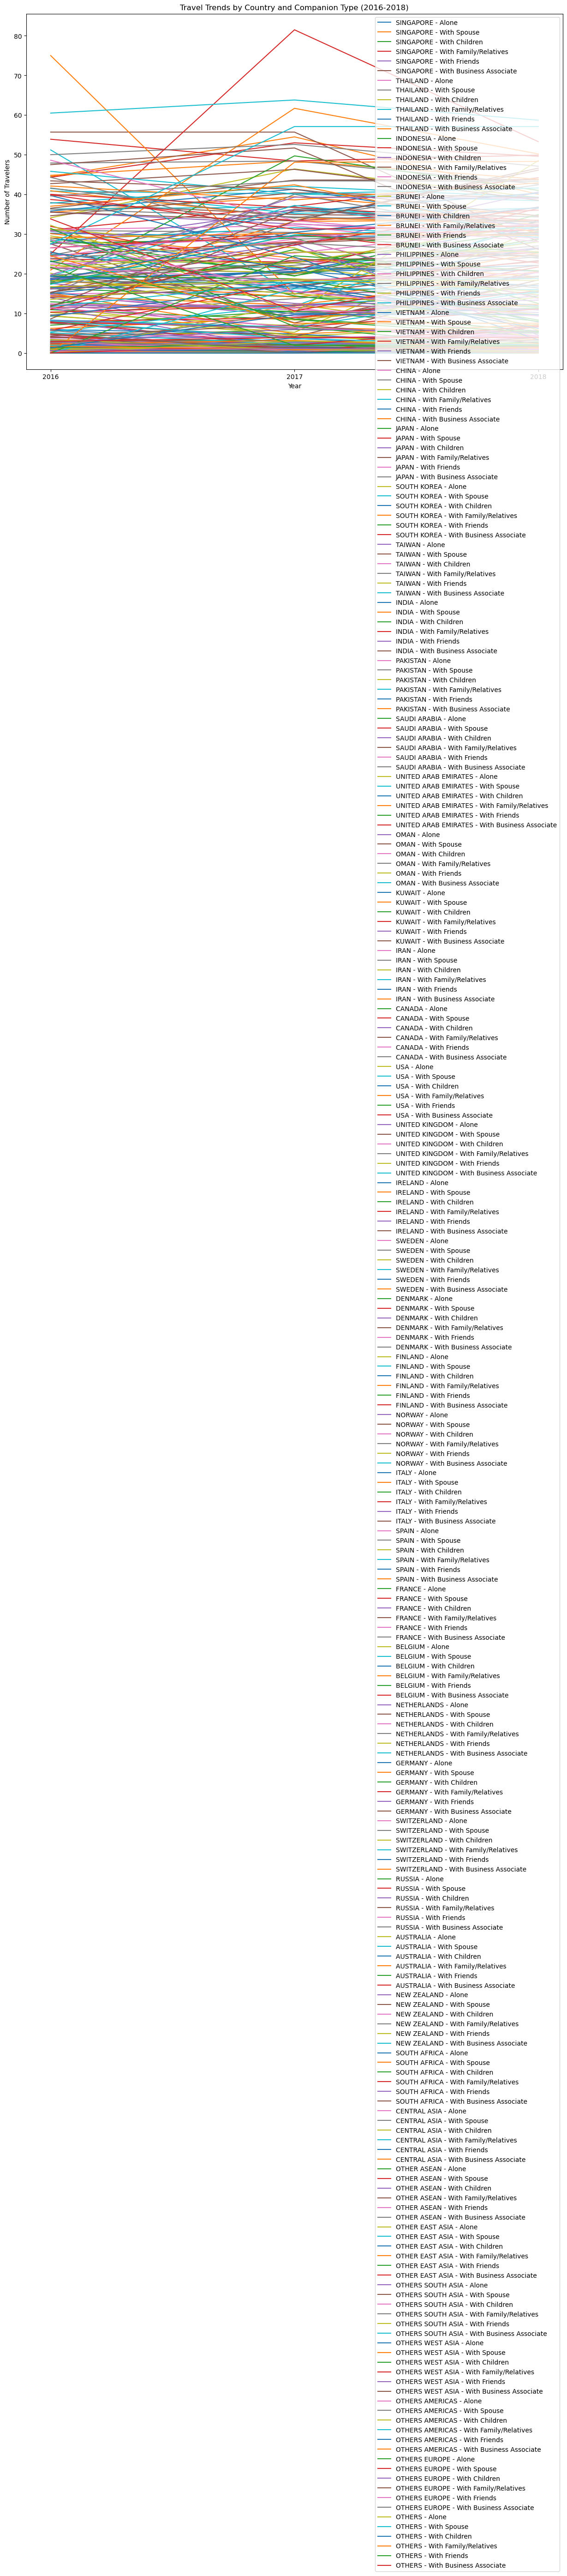

In [23]:
# Correcting the column names
rename_columns_corrected = {
    "ALONE_x": "2016 Alone", "WITH SPOUSE_x": "2016 With Spouse", "WITH CHILDREN_x": "2016 With Children",
    "WITH FAMILY/RELATIVES_x": "2016 With Family/Relatives", "STUDENT GROUP_x": "2016 Student Group",
    "WITH FRIENDS_x": "2016 With Friends", "WITH BUSINESS ACCOCIATE_x": "2016 With Business Associate",
    "WITH INCENTIVE GROUP_x": "2016 With Incentive Group", "OTHERS_x": "2016 Others", "ALONE_y": "2017 Alone",
    "WITH SPOUSE_y": "2017 With Spouse", "WITH CHILDREN_y": "2017 With Children",
    "WITH FAMILY/RELATIVES_y": "2017 With Family/Relatives", "STUDENT GROUP_y": "2017 Student Group",
    "WITH FRIENDS_y": "2017 With Friends", "WITH BUSINESS ACCOCIATE_y": "2017 With Business Associate",
    "WITH INCENTIVE GROUP_y": "2017 With Incentive Group", "OTHERS_y": "2017 Others", "ALONE": "2018 Alone",
    "WITH SPOUSE": "2018 With Spouse", "WITH CHILDREN": "2018 With Children",
    "WITH FAMILY/RELATIVES": "2018 With Family/Relatives", "STUDENT GROUP": "2018 Student Group",
    "WITH FRIENDS": "2018 With Friends", "WITH BUSINESS ACCOCIATE": "2018 With Business Associate",
    "WITH INCENTIVE GROUP": "2018 With Incentive Group", "OTHERS": "2018 Others"
}
combined_travel_df = combined_travel_df.rename(columns=rename_columns_corrected)

# Get all unique countries
all_countries = combined_travel_df["COUNTRY OF NATIONALITY"].unique()

# Plotting the data for all countries
plt.figure(figsize=(15, 10))

for country in all_countries:
    country_data = combined_travel_df[combined_travel_df["COUNTRY OF NATIONALITY"] == country]
    for companion_type in ["Alone", "With Spouse", "With Children", "With Family/Relatives", "With Friends", "With Business Associate"]:
        plt.plot(["2016", "2017", "2018"], 
                 [country_data[f"2016 {companion_type}"].values[0], 
                  country_data[f"2017 {companion_type}"].values[0], 
                  country_data[f"2018 {companion_type}"].values[0]], 
                 label=f"{country} - {companion_type}")

plt.title("Travel Trends by Country and Companion Type (2016-2018)")
plt.xlabel("Year")
plt.ylabel("Number of Travelers")
plt.legend()
plt.show()


In [24]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Initialize a subplot figure with one row and one column (you can add more subplots for each companion type)
fig = make_subplots(rows=1, cols=1)

# Add a line to the subplot for each country for a specific companion type (e.g., 'Alone')
for country in combined_travel_df["COUNTRY OF NATIONALITY"].unique():
    fig.add_trace(
        go.Scatter(
            x=["2016", "2017", "2018"],
            y=[
                combined_travel_df.loc[combined_travel_df["COUNTRY OF NATIONALITY"] == country, "2016 Alone"].values[0],
                combined_travel_df.loc[combined_travel_df["COUNTRY OF NATIONALITY"] == country, "2017 Alone"].values[0],
                combined_travel_df.loc[combined_travel_df["COUNTRY OF NATIONALITY"] == country, "2018 Alone"].values[0]
            ],
            mode='lines',
            name=country
        ),
        row=1, col=1
    )

# Update layout (titles, axis labels, etc.)
fig.update_layout(
    title_text="Travel Trends by Country - 'Alone' (2016-2018)",
    xaxis_title="Year",
    yaxis_title="Number of Travelers"
)

# Show the plot
fig.show()